<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')

#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

## 979 rows
## 6 columns

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values('duration').min() ## (500) Days of Summer is shortest movie @ 64 minutes

star_rating                                                  7.4
title                                       (500) Days of Summer
genre                                                     Action
duration                                                      64
actors_list    [u"Brian O'Halloran", u'Jeff Anderson', u'Mari...
dtype: object

In [7]:
# Answer:
movies.sort_values('duration').max() ## [Rec] is the longest movie @ 242 minutes

star_rating                                                  9.3
title                                                      [Rec]
genre                                                    Western
duration                                                     242
actors_list    [u'Zooey Deschanel', u'Joseph Gordon-Levitt', ...
dtype: object

#### Create a histogram of duration, choosing an "appropriate" number of bins.

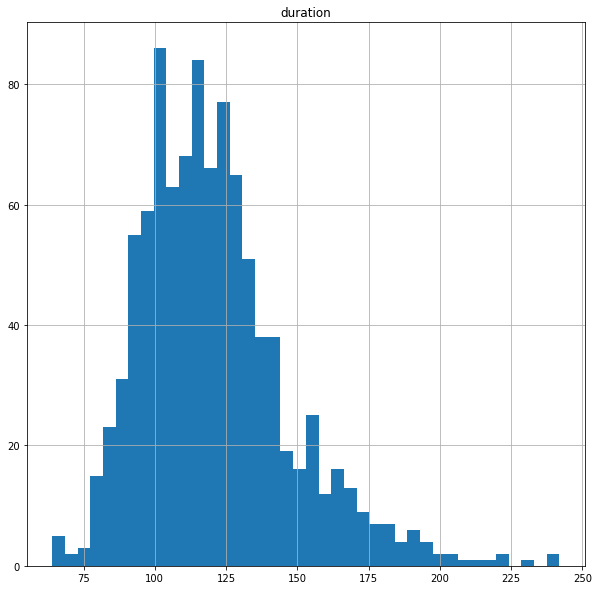

In [8]:
# Answer:
ax = movies.hist('duration', bins = 40, figsize = (10,10))

#### Use a box plot to display that same data.

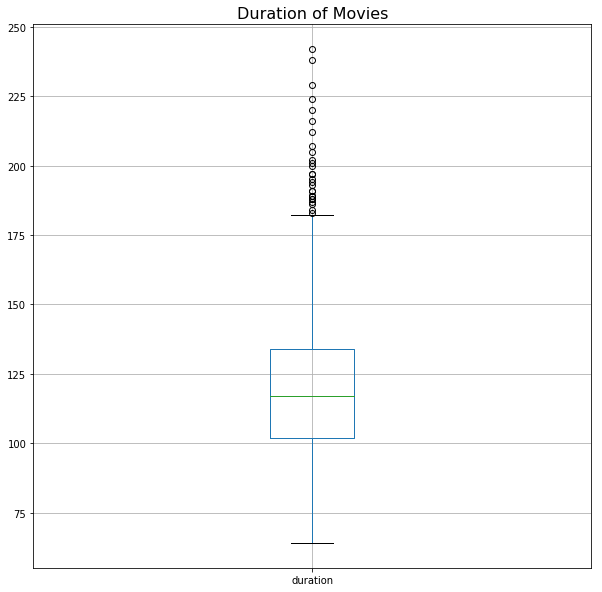

In [9]:
# Answer:
ax = movies.boxplot('duration', figsize = (10,10))
ax.set_title('Duration of Movies', fontsize = 16);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

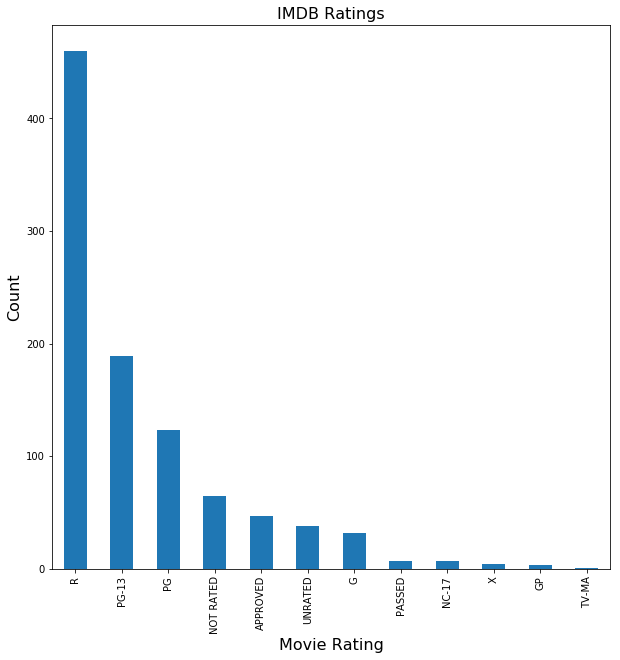

In [11]:
# Answer:
ax = movies.loc[:,'content_rating'].value_counts().plot(kind = 'bar', figsize = (10,10))
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Movie Rating', fontsize=16);
ax.set_title('IMDB Ratings', fontsize=16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
movies.loc[:, 'content_rating'] = movies.replace('NOT RATED','UNRATED')
movies.loc[:, 'content_rating'] = movies.replace('APPROVED','UNRATED')
movies.loc[:, 'content_rating'] = movies.replace('PASSED','UNRATED')
movies.loc[:, 'content_rating'] = movies.replace('GP','UNRATED')
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:
movies.loc[:, 'content_rating'] = movies.replace('TV-MA','NC-17')
movies.loc[:, 'content_rating'] = movies.replace('X','NC-17')
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [14]:
# Answer:
movies.isna().sum() 
##missing 3 values from 'content_rating'

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
movies.loc[:, 'content_rating'] = movies.loc[:, 'content_rating'].fillna(value='NOT RATED')

In [16]:
movies.isna().sum() ##double check no missing values

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [17]:
# Answer:
long = movies.loc[:,'duration'] >= 120
long_avg = movies.loc[long,:].mean()
long_avg

##average star rating is 7.94

star_rating      7.948899
duration       142.458150
dtype: float64

In [18]:
short = movies.loc[:,'duration'] < 120
short_avg = movies.loc[short,:].mean()
short_avg

##average star rating is 7.83

star_rating      7.838667
duration       102.405714
dtype: float64

In [19]:
long_avg - short_avg ##movies 2 hours or longer on average have +0.11 ratings above movies shorter than 2 hours

star_rating     0.110232
duration       40.052435
dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

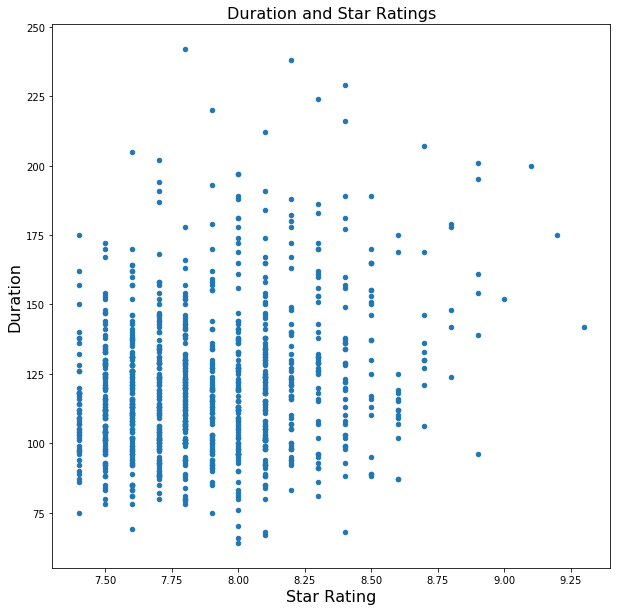

In [20]:
# Answer:
ax = movies.plot(kind = 'scatter', x = 'star_rating', y = 'duration', figsize = (10,10))
ax.set_title('Duration and Star Ratings', size = 16)
ax.set_xlabel('Star Rating', size = 16)
ax.set_ylabel('Duration', size = 16);

#### Calculate the average duration for each genre.

In [21]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

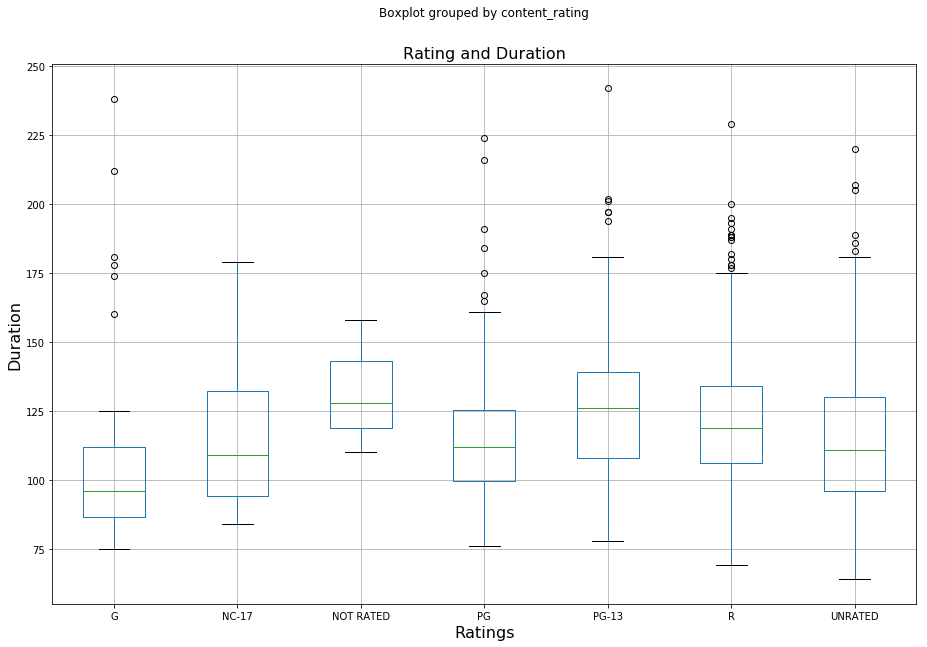

In [22]:
# Answer:
ax = movies.boxplot(column='duration', by='content_rating', figsize = (15,10))
ax.set_title('Rating and Duration', size = 16)
ax.set_xlabel('Ratings', size = 16)
ax.set_ylabel('Duration', size = 16);

#### Find the title of the movie with the highest star rating in each genre

In [23]:
# Answer:
movies.groupby('genre')['title','star_rating'].max()

,title,star_rating
genre,,
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Animation,Wreck-It Ralph,8.6
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Crime,Zodiac,9.3
Drama,Zulu,8.9
Family,Willy Wonka & the Chocolate Factory,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [24]:
# Answer:
check = movies[movies.title.duplicated()].title ##create check variable to see if title is duplicated
movies[movies.title.isin(check)] ##filter based on 'check' variable to show duplicated movies
##No Duplicates, multiple movies, same titles

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NOT RATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [25]:
# Answer:
relevant = ['Drama','Animation','Comedy','Crime','Action','Biography','Adventure','Horror','Mystery'] ##manually create list that have at least 10 movies
movies[movies.genre.isin(relevant)].groupby('genre').star_rating.mean() ##check if 'relevant' is in 'genre', then group by relevant genre and give the star rating average

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [26]:
# Answer:
gcount = movies.genre.value_counts() ##count how many movies in each genre
filtered = gcount[gcount > 10].index ##create 'filtered' variable to store relevant genres that have at least 10 movies
movies[movies.genre.isin(filtered)].groupby('genre').star_rating.mean() ##check if 'relevant' list is in 'genre', then group by relevant genre and give the star rating average

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [119]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [27]:
# Answer:
movie_mean = movies.groupby('genre').star_rating.agg(['count', 'mean'])
movie_mean['counts'] = movie_mean['count']
movie_mean[movie_mean.counts >= 10].drop(['count','counts'], axis=1)

,mean
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [28]:
movies.loc[:,'actors_list'].value_counts().head()

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']        6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']          3
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                  2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']     2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']    2
Name: actors_list, dtype: int64

In [ ]:
##The cast of 'Harry Potter' had the most movies acted in together compared to the entire list at 6 movies together, followed by 'Star Wars' with 3 movies together